In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Lade das Datenset
# Tausche hier die Daten aus
partei_datensatz = pd.read_csv("gruene.csv")
partei_name = "Grüne"
Angelobung_Datum = "2020-01-07"


# Teste ob die Daten funktionieren
datensatz_kurz = partei_datensatz[1000:1005]
#print(datensatz_kurz["Inhalt"][1])

In [5]:
angelobung = pd.to_datetime(Angelobung_Datum)
print(angelobung)

2020-01-07 00:00:00


In [172]:
# Installiere wenn du ihn noch nicht hast, den Sentiment analyser
#pip install germansentiment

In [6]:
from germansentiment import SentimentModel


c:\Users\Clemens Schweizer\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
model = SentimentModel()

In [8]:
# Definiere die Funktion zur Berechnung des Scores

def sentiment_calculator(text):
    classes, probabilities = model.predict_sentiment([text], output_probabilities = True)
    # Berechnet einen Wert zwischen 1 und 3, wobei 3 sehr positiv ist und 1 sehr negativ.
    # Da uns das deutsche Sentiment Package nur die WSK gibt, habe ich daraus einen score kalkuliert.
    # 3 ist nur positiv, 2 ist komplett neutral, 1 ist komplett negativ
    score_zw_1_und_3 = (probabilities[0][0][1])*3+(probabilities[0][1][1])*1+(probabilities[0][2][1])*2
    # positive_wsk*3 + neutrale_wsk*2 + negative_wsk)*1
    return score_zw_1_und_3

In [9]:
# Speichert den Score in einer neuen Zeile
datensatz_kurz
#partei_datensatz["Sentiment Score"]=partei_datensatz["Inhalt"].apply(sentiment_calculator)
partei_datensatz["Sentiment Score"]=partei_datensatz["Inhalt"].apply(sentiment_calculator)


print(partei_datensatz[["Titel","Sentiment Score","Datum"]])

                                                  Titel  Sentiment Score  \
0     Grüne unterstützen WWF-Appell für Öko-Steuerre...         1.982245   
1     Kogler: Bei Mindestsicherungs-Chaos sofort vol...         1.065928   
2     AVISO: Montag, 14.1., 10.30h: PK Hebein/Kogler...         1.999191   
3     AVISO: Freitag, 18.1., 9.30 Uhr: PK Kogler anl...         1.999022   
4     Waitz: Glyphosat-Bewertung stammt zum Teil von...         1.998283   
...                                                 ...              ...   
1321  Grüne/Litschauer: AKW Krško ist weiterhin eine...         1.993590   
1322          Kogler und Stoytchev danken Birgit Hebein         1.997644   
1323  Grüne begrüßen britische Ablehnung des US-Ausl...         1.984869   
1324  Grüne/Weratschnig: Lehren aus der Covid-Krise ...         1.997587   
1325  Ernst-Dziedzic zu Washington-Krawallen: Freie ...         1.206881   

                    Datum  
0     2019-01-09 11:05:35  
1     2019-01-10 13:23:39  
2  

In [10]:
# Schaut, ob der Tag vor oder nach der Angelobung liegt

def datums_checker(veröffentlichungs_datum):
    kurzes_datum =pd.to_datetime(veröffentlichungs_datum[:10])
    if kurzes_datum > angelobung:
        return 1
    else:
        return 0
    

partei_datensatz["Nach Angelobung"]=partei_datensatz["Datum"].apply(datums_checker)

print(partei_datensatz)

                    Datum                                              Titel  \
0     2019-01-09 11:05:35  Grüne unterstützen WWF-Appell für Öko-Steuerre...   
1     2019-01-10 13:23:39  Kogler: Bei Mindestsicherungs-Chaos sofort vol...   
2     2019-01-11 10:26:30  AVISO: Montag, 14.1., 10.30h: PK Hebein/Kogler...   
3     2019-01-11 11:11:01  AVISO: Freitag, 18.1., 9.30 Uhr: PK Kogler anl...   
4     2019-01-15 09:49:43  Waitz: Glyphosat-Bewertung stammt zum Teil von...   
...                   ...                                                ...   
1321  2020-12-30 10:25:19  Grüne/Litschauer: AKW Krško ist weiterhin eine...   
1322  2020-12-30 12:00:09          Kogler und Stoytchev danken Birgit Hebein   
1323  2021-01-04 14:56:57  Grüne begrüßen britische Ablehnung des US-Ausl...   
1324  2021-01-05 12:19:08  Grüne/Weratschnig: Lehren aus der Covid-Krise ...   
1325  2021-01-07 09:35:35  Ernst-Dziedzic zu Washington-Krawallen: Freie ...   

                                       

In [11]:
partei_datensatz["Sentiment Score"]


0       1.982245
1       1.065928
2       1.999191
3       1.999022
4       1.998283
          ...   
1321    1.993590
1322    1.997644
1323    1.984869
1324    1.997587
1325    1.206881
Name: Sentiment Score, Length: 1326, dtype: float64

In [13]:
# Berechne den Durchschnitt vor der Angelobung
vor_angelobung_avg = partei_datensatz[partei_datensatz["Nach Angelobung"] == 0]["Sentiment Score"].mean()
print(vor_angelobung_avg)

vor_angelobung_std = partei_datensatz[partei_datensatz["Nach Angelobung"] == 0]["Sentiment Score"].std()
print(vor_angelobung_std)

vor_angelobung_len = len(partei_datensatz[partei_datensatz["Nach Angelobung"] == 0])
print(vor_angelobung_len)


# Berechne den Durschnitt nach der Angelobung
nach_angelobung_avg = partei_datensatz[partei_datensatz["Nach Angelobung"] == 1]["Sentiment Score"].mean()
print(nach_angelobung_avg)

nach_angelobung_std = partei_datensatz[partei_datensatz["Nach Angelobung"] == 1]["Sentiment Score"].std()
print(nach_angelobung_std)

nach_angelobung_len = len(partei_datensatz[partei_datensatz["Nach Angelobung"] == 1])
print(nach_angelobung_len)

print(f"{partei_name} Durchschnitt vor der Angelobung: {vor_angelobung_avg}")
print(f"{partei_name} Durchschnitt nach der Angelobung: {nach_angelobung_avg}")

1.7992115683702632
0.3361972395649533
384
1.9288838337935577
0.20952869284628162
942
Grüne Durchschnitt vor der Angelobung: 1.7992115683702632
Grüne Durchschnitt nach der Angelobung: 1.9288838337935577


In [15]:
# Berechne den t-test
group1 = np.random.normal(vor_angelobung_avg, vor_angelobung_std, vor_angelobung_len)
group2 = np.random.normal(nach_angelobung_avg, nach_angelobung_std, nach_angelobung_len)

# t-Test durchführen
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test (ungleiche Varianzen)
print(f"T-Wert: {t_stat:.3f}, p-Wert: {p_value:.10f}")

T-Wert: -6.790, p-Wert: 0.0000000000


In [16]:
partei_datensatz
# Sortiere die Daten nach Monat
def datums_kürzer(veröffentlichungs_datum):
    jahr_monat = veröffentlichungs_datum[:7]
    return jahr_monat
    

partei_datensatz["Jahr_Monat"]=partei_datensatz["Datum"].apply(datums_kürzer)

print(partei_datensatz)

                    Datum                                              Titel  \
0     2019-01-09 11:05:35  Grüne unterstützen WWF-Appell für Öko-Steuerre...   
1     2019-01-10 13:23:39  Kogler: Bei Mindestsicherungs-Chaos sofort vol...   
2     2019-01-11 10:26:30  AVISO: Montag, 14.1., 10.30h: PK Hebein/Kogler...   
3     2019-01-11 11:11:01  AVISO: Freitag, 18.1., 9.30 Uhr: PK Kogler anl...   
4     2019-01-15 09:49:43  Waitz: Glyphosat-Bewertung stammt zum Teil von...   
...                   ...                                                ...   
1321  2020-12-30 10:25:19  Grüne/Litschauer: AKW Krško ist weiterhin eine...   
1322  2020-12-30 12:00:09          Kogler und Stoytchev danken Birgit Hebein   
1323  2021-01-04 14:56:57  Grüne begrüßen britische Ablehnung des US-Ausl...   
1324  2021-01-05 12:19:08  Grüne/Weratschnig: Lehren aus der Covid-Krise ...   
1325  2021-01-07 09:35:35  Ernst-Dziedzic zu Washington-Krawallen: Freie ...   

                                       

In [17]:
durchschnitt_pro_monat = partei_datensatz.groupby('Jahr_Monat')['Sentiment Score'].mean()
print(durchschnitt_pro_monat)
monatswert = pd.DataFrame(durchschnitt_pro_monat)
x = monatswert.index.to_list()
y = monatswert["Sentiment Score"].to_list()
print(y)

Jahr_Monat
2019-01    1.761362
2019-02    1.739513
2019-03    1.706491
2019-04    1.794566
2019-05    1.809223
2019-06    1.803101
2019-07    1.748677
2019-08    1.840348
2019-09    1.813649
2019-10    1.809616
2019-11    1.873108
2019-12    1.894290
2020-01    2.005438
2020-02    1.903330
2020-03    1.920191
2020-04    1.941375
2020-05    1.954010
2020-06    1.909351
2020-07    1.974594
2020-08    1.922538
2020-09    1.907158
2020-10    1.948693
2020-11    1.877380
2020-12    1.927248
2021-01    1.729779
Name: Sentiment Score, dtype: float64
[1.7613615997189689, 1.739512840868402, 1.7064914696190498, 1.794565508916331, 1.8092225745948174, 1.8031006872743487, 1.7486766778256424, 1.8403483075616633, 1.8136485285880604, 1.8096156500432699, 1.873107736164931, 1.8942900234945357, 2.005437563912231, 1.9033295070780696, 1.9201905222941302, 1.9413752075627713, 1.9540096327046732, 1.909350608521641, 1.9745941951836725, 1.9225376978297504, 1.9071575682463278, 1.948693310482567, 1.87737959249625

In [18]:
# Speichert in neuem Datensatz
partei_datensatz.to_csv("mit_sentiment_score")
monatswert.to_csv("liniendiagramm")

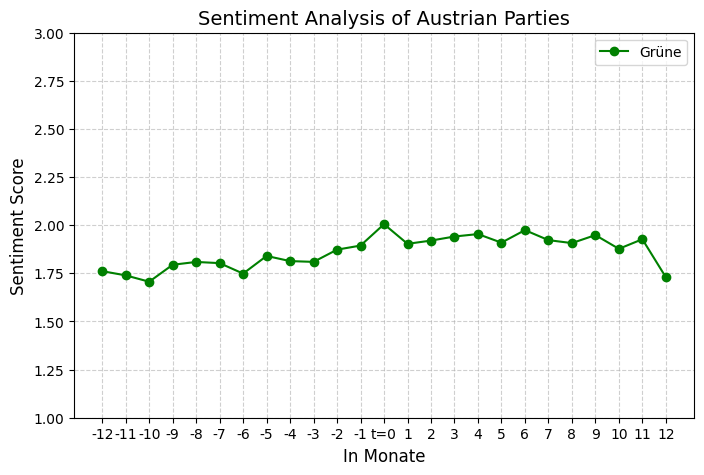

In [19]:
plt.figure(figsize=(8, 5))
x = [-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, "t=0", 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.plot(x, y, marker='o', linestyle='-', color='g', label='Grüne')
plt.ylim(1, 3)


# Diagrammbeschriftungen und Titel
plt.title('Sentiment Analysis of Austrian Parties', fontsize=14)
plt.xlabel('In Monate', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)

# Gitter und Legende hinzufügen
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

# Diagramm anzeigen
plt.show()